In [2]:
import numpy as np
import serpentine as sp
from matplotlib import pyplot as plt
import cooler

Load data and perform a subsampling on the whole matrix

1202649.0
1113199.0
1102055.0
1102055.0
1070457
1070457


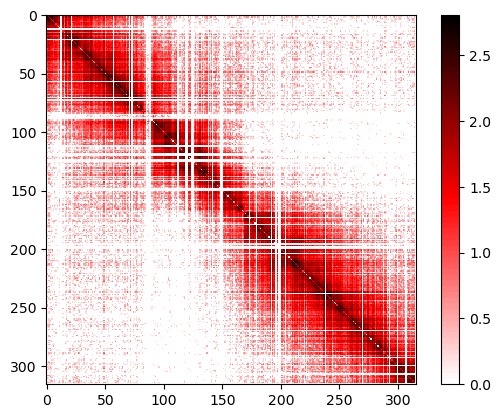

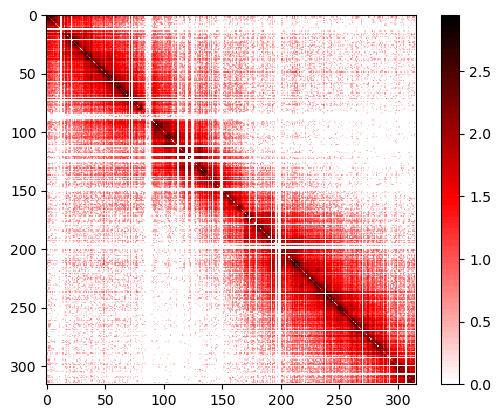

In [179]:
#you need to load your datasets with numpy
input_dir = "/mnt/e/Science/HiC/Contact_files/Dense/S288c/"
out_dir = "/mnt/d/Science/OwnCloud/Experiments/HiC/Serpentine/DSB/"
dir_seqs= "/mnt/d/Science/OwnCloud/Sequences/Genomes/"

inputA = "SRX20747220_SRR24991178_S288c_DSB_chr3_rDNA_q20" #write sample name A here e.g. AP47
#inputA = "AD337_S288c_DSB_cutsite_q20"
inputB = "SRX20747222_SRR24991174_S288c_DSB_chr3_rDNA_q20"

chrom = "chr3" #chromosome number e.g. chr5
#DSB_pos = 777810 #chr4-765kb
#DSB_pos = 845464 #chr5 S288c_DSB
#for W303 chr5 DSB_pos=117000
#for S288c_DSB chr5 DSB_pos=118700
#for W303 chr4 DSB_pos=848500
#for S288c chr4 DSB_pos=845464

nA = np.loadtxt(str(input_dir + inputA + "_" + str(chrom) + "_dense_1kb.mat.csv"), dtype=np.float64)
nB = np.loadtxt(str(input_dir + inputB + "_" + str(chrom) + "_dense_1kb.mat.csv"), dtype=np.float64)
#chrs = pd.read_csv(str(dir_seqs + "Yeast_genome_W303_Marcand/W303_710_chromosome_centromere_coordinates.tsv"), sep = "\t")



#anchor_bin = DSB_pos/1000
#bin_nb = 30 #length in bins to use for normalization
#bins = np.arange(-bin_nb, bin_nb+1, 1)        
#anchor_bin = int(frags[(frags["chrom"]== chrom) & (frags["start_pos"] < DSB_pos) & (frags["end_pos"] >= DSB_pos)].index.values)

#subsampling chr 5=576 chr4=1531 chr3=316
bins=len(sum(nA))
print(sum(sum(nA[:,0:bins])))
print(sum(sum(nB[:,0:bins])))

for i in range(0,bins):
    a=np.array(nA[:,i], dtype="int64")
    b=np.array(nB[:,i], dtype="int64")
    target = min(sum(a), sum(b))
    #print(sum(a))
    #print(sum(b))
    if sum(a)>sum(b):
        a_idx = np.array([i for i in range(len(a))])
        a_idx = np.repeat(np.arange(len(a)), a)
        a_sub_idx = np.random.permutation(a_idx)[:target]
        a_sub_idx, a_sub_vals = np.unique(a_sub_idx, return_counts=True)
        a_sub = np.zeros(a.shape)
        a_sub[a_sub_idx] = a_sub_vals
        #print(a_sub)
        #print(int(sum(a_sub)))
        nA[:,i]=a_sub
    else:
        b_idx = np.array([i for i in range(len(b))])
        b_idx = np.repeat(np.arange(len(b)), b)
        b_sub_idx = np.random.permutation(b_idx)[:target]
        b_sub_idx, b_sub_vals = np.unique(b_sub_idx, return_counts=True)
        b_sub = np.zeros(b.shape)
        b_sub[b_sub_idx] = b_sub_vals
        #print(b_sub)
        #print(int(sum(b_sub)))
        nB[:,i]=b_sub

print(sum(sum(nA)))
print(sum(sum(nB)))

for i in range(0,bins):
    a=np.array(nA[i,:], dtype="int64")
    b=np.array(nB[i,:], dtype="int64")
    target = min(sum(a), sum(b))
    #print(sum(a))
    #print(sum(b))
    if sum(a)>sum(b):
        a_idx = np.array([i for i in range(len(a))])
        a_idx = np.repeat(np.arange(len(a)), a)
        a_sub_idx = np.random.permutation(a_idx)[:target]
        a_sub_idx, a_sub_vals = np.unique(a_sub_idx, return_counts=True)
        a_sub = np.zeros(a.shape)
        a_sub[a_sub_idx] = a_sub_vals
        #print(a_sub)
        #print(int(sum(a_sub)))
        nA[i,:]=a_sub
    else:
        b_idx = np.array([i for i in range(len(b))])
        b_idx = np.repeat(np.arange(len(b)), b)
        b_sub_idx = np.random.permutation(b_idx)[:target]
        b_sub_idx, b_sub_vals = np.unique(b_sub_idx, return_counts=True)
        b_sub = np.zeros(b.shape)
        b_sub[b_sub_idx] = b_sub_vals
        #print(b_sub)
        #print(int(sum(b_sub)))
        nB[i,:]=b_sub
        
        
A = np.array(nA, dtype="int64")
B = np.array(nB, dtype="int64")

print(sum(sum(A[:,0:bins])))
print(sum(sum(B[:,0:bins])))

        
fig = plt.figure()
sp.mshow(A)
fig = plt.figure()
sp.mshow(B)


Select only the chr12 part on the left of the rDNA

7961


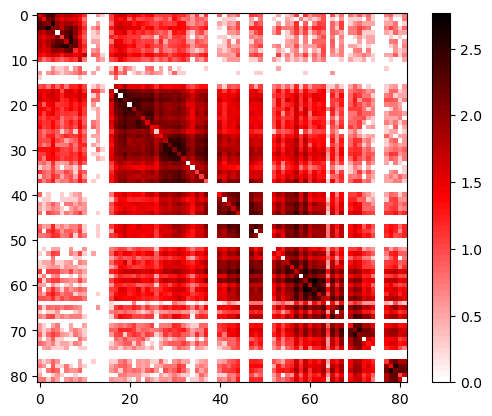

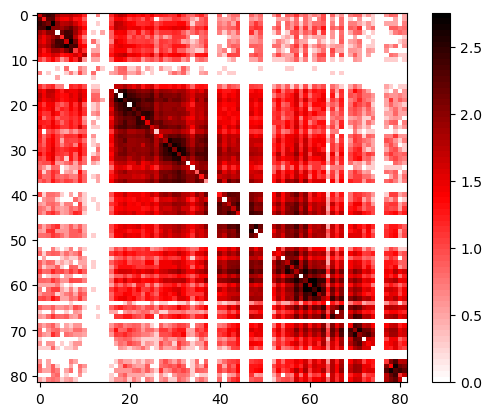

In [180]:

#rDNA coordinates = 450
start = 74
stop = 156
A=A[start:stop,start:stop]
B=B[start:stop,start:stop]

#Other start-stop on chr11
#start=200
#stop=420
#A=A[start:stop,start:stop]
#B=B[start:stop,start:stop]

fig = plt.figure()
sp.mshow(A)
fig = plt.figure()
sp.mshow(B)
print(sum(sum(A[start:stop,:])))

1207636


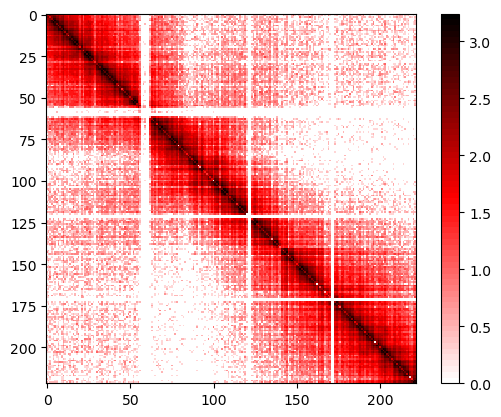

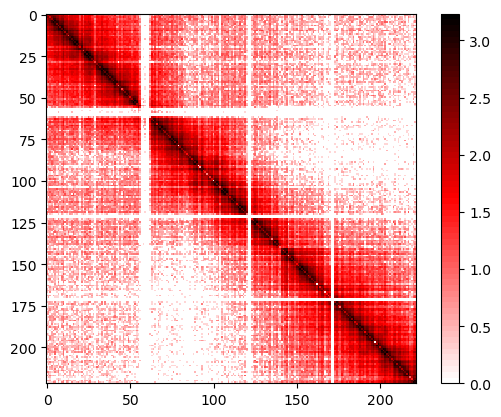

In [133]:

#chr3 RE coordinates = 450
start = 28
stop = 250
A=A[start:stop,start:stop]
B=B[start:stop,start:stop]

fig = plt.figure()
sp.mshow(A)
fig = plt.figure()
sp.mshow(B)
print(sum(sum(A[start:stop,:])))

Optional: remove certain bins (eg HO that creates artefact on chrIV)

0


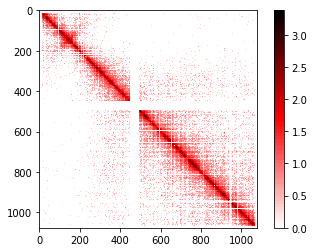

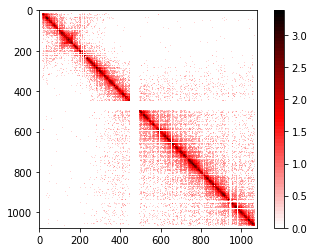

In [52]:
#HO coordinates = chrIV:46271..48031 -> bins 45-48
#rDNA and extra repeats is ~450-491
start = 450
stop = 492
A[start:stop,:] = 0
A[:,start:stop] = 0
B[start:stop,:] = 0
B[:,start:stop] = 0




fig = plt.figure()
sp.mshow(A)
fig = plt.figure()
sp.mshow(B)
print(sum(sum(A[start:stop,:])))

Finding the binning threshold and the de-trending constant

The coverage of the data will impact how much binning is needed. On top of that, when comparing matrices with different coverages, one needs to find the so-called trending constant that need to be subtracted from the result. In order to do this, our library provides a tool in the form of an mean-difference (MD) plot. This graph suggests that the data has a characteristic noise-to-signal ratio at large coverages that becomes much larger at lower coverages due to sampling noise.

The function MDbefore finds the optimal trending and threshold values, the graph higlights the median and the median absolute deviation (MAD) as red and green lines. Both are plotted as a function of the mean contact number:

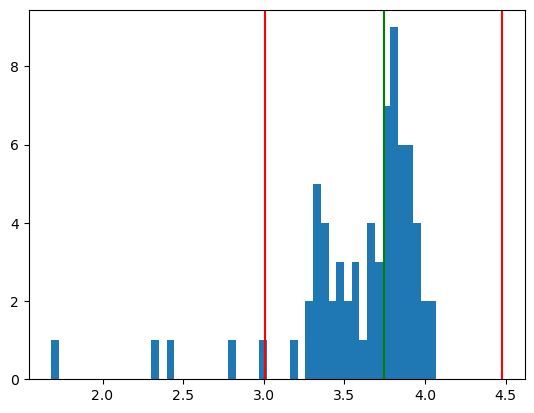

In [181]:
#The raw data needs to be filtered in order to clean the unmappable rows and columns, this kind of artifacts shows up in the distribution of reads per bin as outliers:

plt.figure()
norm = np.log10(np.sum(A + B, axis=0)[np.sum(A + B, axis=0) > 0])
norm = norm[np.isnan(norm) == False]
norm = norm[np.isinf(np.abs(norm)) == False]
plt.hist(norm, bins=50)
plt.axvline(x=np.median(norm), color='g')
plt.axvline(x=np.median(norm) - 3 * 1.4826 * sp.mad(norm), color='r')
plt.axvline(x=np.median(norm) + 3 * 1.4826 * sp.mad(norm), color='r')

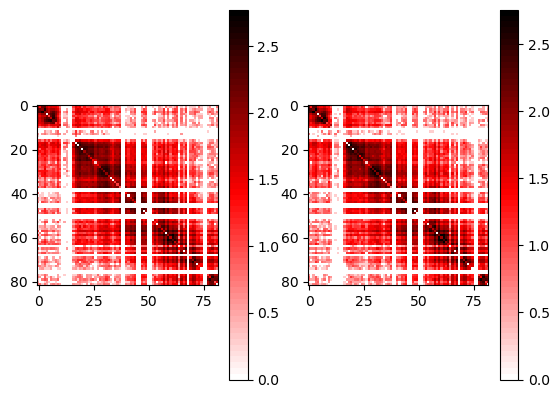

In [182]:
#flt = sp.outstanding_filter(A) + sp.outstanding_filter(B)
#flt = flt == False
#A = sp.fltmatr(A, flt)
#B = sp.fltmatr(B, flt)

fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1); sp.mshow(A, subplot=ax1)
ax2 = fig.add_subplot(1, 2, 2); sp.mshow(B, subplot=ax2)

Serpenting binning the data

Finally you can use the function to bin the data. The function takes two parameters: a threshold that constrains the coverage of the bin in at least one matrix, and the minthreshold that constrain it in both. The function uses multiple processors and can be configured by the optional parameters:

0.0839148024838043 49.999999999999986
Starting 30 binning processes in batches of 4...
0	 Total serpentines: 6724 (100.0 %)
0	 Total serpentines: 6724 (100.0 %)
0	 Total serpentines: 6724 (100.0 %)
0	 Total serpentines: 6724 (100.0 %)
1	 Total serpentines: 4785 (71.16299821534801 %)
1	 Total serpentines: 4792 (71.26710291493158 %)
1	 Total serpentines: 4808 (71.50505651397977 %)1	 Total serpentines: 4780 (71.08863771564545 %)

2	 Total serpentines: 2417 (35.94586555621654 %)
3	 Total serpentines: 1777 (26.427721594289114 %)
2	 Total serpentines: 2413 (35.88637715645449 %)2	 Total serpentines: 2431 (36.1540749553837 %)

4	 Total serpentines: 1639 (24.375371802498513 %)
2	 Total serpentines: 2435 (36.213563355145745 %)
3	 Total serpentines: 1782 (26.50208209399167 %)
5	 Total serpentines: 1626 (24.18203450327186 %)3	 Total serpentines: 1794 (26.68054729327781 %)

3	 Total serpentines: 1784 (26.531826293872694 %)4	 Total serpentines: 1648 (24.509220701963116 %)

4	 Total serpentines: 1664

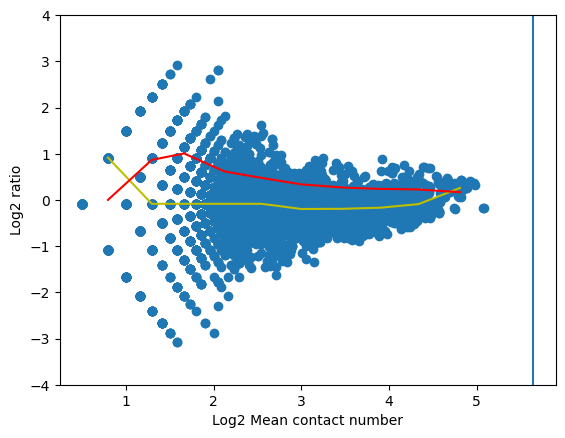

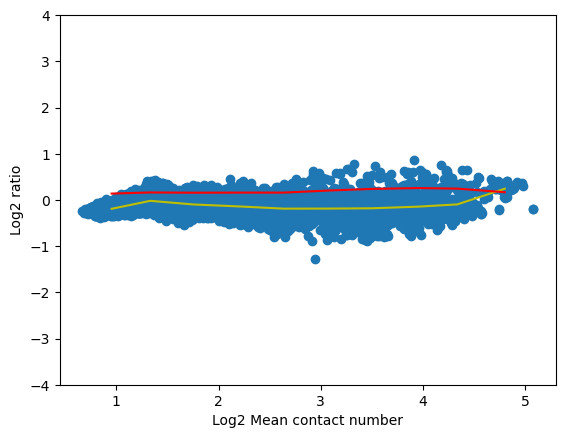

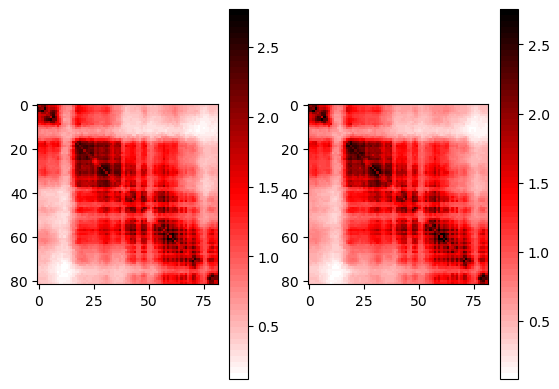

In [183]:
high=50
low=10
cycles = 30
plt.figure()
trend, threshold = sp.MDbefore(A, B, ylim=[-4, 4])
print(trend, threshold)

from scipy.ndimage import gaussian_filter
sA, sB, sK = sp.serpentin_binning(A, B, high, low, cycles)

#check binning quality
plt.figure()
sp.MDafter(sA, sB, sK, ylim=[-4, 4])

#check matrices
fig = plt.figure();
ax1 = fig.add_subplot(1, 2, 1)
sp.mshow(sA, subplot=ax1)
ax2 = fig.add_subplot(1, 2, 2)
sp.mshow(sB, subplot=ax2)

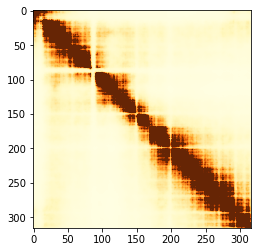

In [7]:
#plot individual matrices serpentinized
mini=0
maxi=25
suffix = str("_" + str(chrom) + "_serp_bin_low_" + str(int(low)) + "_max_" + str(int(high)) + "_colorscale_min_" + str(mini) + "_max_" + str(maxi) + ".pdf")

plt.imshow(sA, cmap = "YlOrBr", vmin=mini, vmax=maxi)
plt.savefig(str(out_dir + inputA + suffix), format='pdf', dpi=600)
plt.imshow(sB, cmap = "YlOrBr", vmin=mini, vmax=maxi)
plt.savefig(str(out_dir + inputB + suffix), format='pdf', dpi=600)

Checking the differential analysis

Similarly, we improved the differential analysis, before the binning, we could have obtained this kind of results:
Before binning:

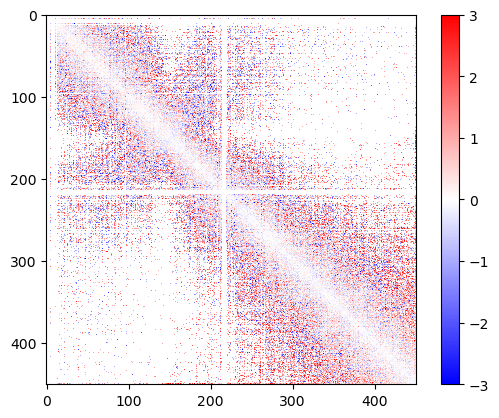

In [106]:
plt.figure()
#np.warnings.filterwarnings('ignore')
D = np.log2(B/A)
sp.dshow(D, trend, cmap= "bwr")

SRX20747222_SRR24991174_S288c_DSB_chr3_rDNA_q20 over SRX20747220_SRR24991178_S288c_DSB_chr3_rDNA_q20
-0.01997379420131671 0.0839148024838043


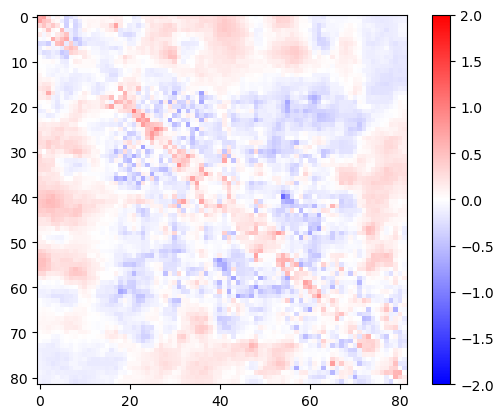

In [184]:
lim = 2
tr = np.mean(sK)
print(str(inputB), "over", str(inputA))
sp.dshow(sK, tr, cmap="bwr", limit = lim)
#str("/mnt/d/OwnCloud Data/Experiments/HiC/Contact_files/Dense/" + inputB + "_" + chrom + "_dense_1kb.mat.csv")
plt.savefig(str(out_dir + inputB + "over" + inputA + "_" + chrom + "_CEN3_1kb_bwr_trend_mean_" + str(tr) + "_lim_" + str(lim) + "_low_" + str(low) + "_high_" + str(high) + ".pdf"), format='pdf', dpi=600)
#plt.savefig(str(out_dir + inputB + "over" + inputA + "_" + chrom + "_1kb_bwr_trend_mean_" + str(tr) + "_lim_" + str(lim) + ".png"), dpi=600)
print(np.mean(sK), trend)

SRX20747220_SRR24991178_S288c_DSB_chr3_rDNA_q20 over SRX20747222_SRR24991174_S288c_DSB_chr3_rDNA_q20
-0.01997379420131671 0.0839148024838043


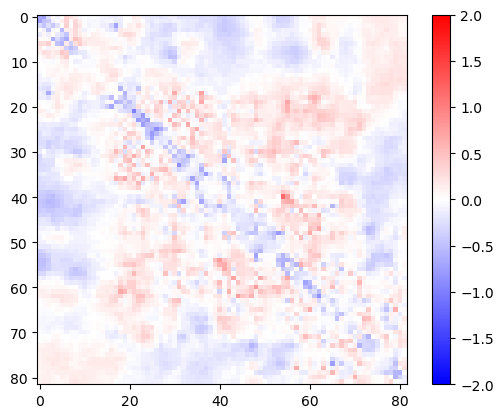

In [185]:
#after binning reverse
lim = 2
tr = np.mean(sK)
print(str(inputA), "over", str(inputB))
sp.dshow(-sK, -tr, cmap="bwr", limit = lim)
str("/mnt/d/OwnCloud Data/Experiments/HiC/Contact_files/Dense/" + inputB + "_" + chrom + "_dense_1kb.mat.csv")
plt.savefig(str(out_dir + inputA + "over" + inputB + "_" + chrom + "_CEN3_1kb_bwr_trend_" + str(tr) + "_lim_" + str(lim) + "_low_" + str(low) + "_high_" + str(high) + ".pdf"), format='pdf', dpi=600)
#plt.savefig(str(out_dir + inputA + "over" + inputB + "_" + chrom + "_1kb_bwr_trend_" + str(tr) + "_lim_" + str(lim) + ".png"), dpi=600)
print(np.mean(sK), trend)

SRX20747222_SRR24991174_S288c_DSB_chr3_rDNA_q20 over SRX20747220_SRR24991178_S288c_DSB_chr3_rDNA_q20


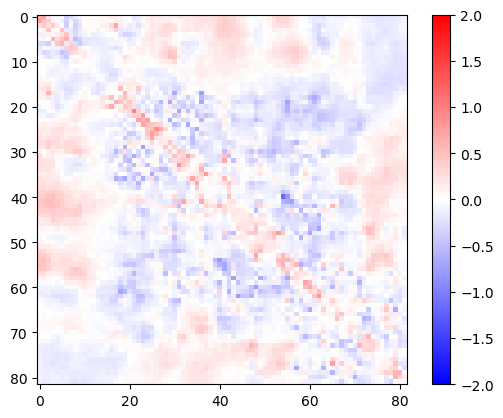

In [186]:
lim = 2
tr = 0
print(str(inputB), "over", str(inputA))
sp.dshow(sK, tr, cmap="bwr", limit = lim)
#str("/mnt/d/OwnCloud Data/Experiments/HiC/Contact_files/Dense/" + inputB + "_" + chr + "_dense_1kb.mat.csv")
plt.savefig(str(out_dir + inputB + "over" + inputA + "_" + chrom + "_CEN3_1kb_bwr_trend_" + str(tr) + "_lim_" + str(lim) + "_low_" + str(low) + "_high_" + str(high) + ".pdf"), format='pdf', dpi=600)
#plt.savefig(str(out_dir + inputB + "over" + inputA + "_" + chrom + "_1kb_bwr_trend_" + str(tr) + "_lim_" + str(lim) + ".png"), dpi=600)

SRX20747220_SRR24991178_S288c_DSB_chr3_rDNA_q20 over SRX20747222_SRR24991174_S288c_DSB_chr3_rDNA_q20


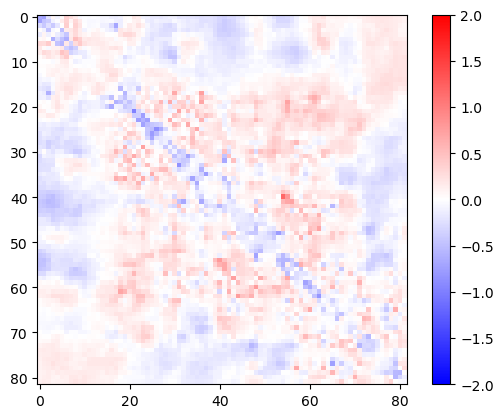

In [187]:
lim = 2
tr = 0
print(str(inputA), "over", str(inputB))
sp.dshow(-sK, -tr, cmap="bwr", limit = lim)
#str("/mnt/d/OwnCloud Data/Experiments/HiC/Contact_files/Dense/" + inputB + "_" + chr + "_dense_1kb.mat.csv")
plt.savefig(str(out_dir + inputA + "over" + inputB + "_" + chrom + "_CEN3_1kb_bwr_trend_" + str(tr) + "_lim_" + str(lim) + "_low_" + str(low) + "_high_" + str(high) + ".pdf"), format='pdf', dpi=600)
#plt.savefig(str(out_dir + inputB + "over" + inputA + "_" + chrom + "_1kb_bwr_trend_" + str(tr) + "_lim_" + str(lim) + ".png"), dpi=600)

0.07672434279457879
SRX20747222_SRR24991174_S288c_DSB_chr3_rDNA_q20 over SRX20747219_SRR24991179_S288c_DSB_chr3_rDNA_q20


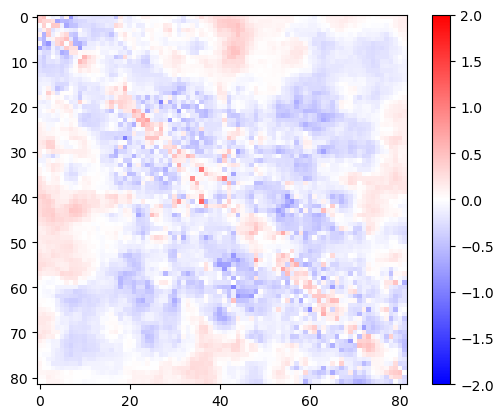

In [177]:
#after binning
lim = 2
tr = trend
print(tr)
print(str(inputB), "over", str(inputA))
sp.dshow(sK, tr, cmap="bwr", limit = lim)
#str("/mnt/d/OwnCloud Data/Experiments/HiC/Contact_files/Dense/" + inputB + "_" + chrom + "_dense_1kb.mat.csv")
plt.savefig(str(out_dir + inputB + "over" + inputA + "_" + str(chrom) + "_CEN3_1kb_bwr_default_trend_" + str(tr) + "_lim_" + str(lim) + "_low_" + str(low) + "_high_" + str(high) + ".pdf"), format='pdf', dpi=600)
#plt.savefig(str(out_dir + inputB + "over" + inputA + "_" + str(chrom) + "_1kb_bwr_default_trend_" + str(tr) + "_lim_" + str(lim) + ".png"), dpi=600)

SRX20747219_SRR24991179_S288c_DSB_chr3_rDNA_q20 over SRX20747222_SRR24991174_S288c_DSB_chr3_rDNA_q20


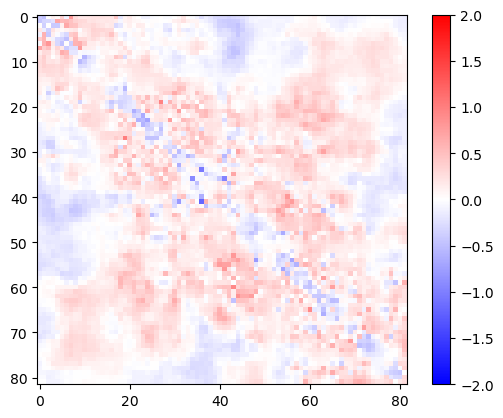

In [178]:
#after binning reverse
lim = 2
tr = trend
print(str(inputA), "over", str(inputB))
sp.dshow(-sK, -tr, cmap="bwr", limit = lim)
str("/mnt/d/OwnCloud Data/Experiments/HiC/Contact_files/Dense/" + inputB + "_" + chrom + "_dense_1kb.mat.csv")
plt.savefig(str(out_dir + inputA + "over" + inputB + "_" + chrom + "_CEN3_1kb_bwr_trend_" + str(tr) + "_lim_" + str(lim) + "_low_" + str(low) + "_high_" + str(high) + ".pdf"), format='pdf', dpi=600)
#plt.savefig(str(out_dir + inputA + "over" + inputB + "_" + chrom + "_1kb_bwr_trend_" + str(tr) + "_lim_" + str(lim) + ".png"), dpi=600)